In [1]:
# Numerical/scientific computing packages.
import numpy as np
import pandas as pd
import scipy

# Machine learning package.
import sklearn
from sklearn import metrics
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, classification_report, roc_auc_score, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import make_pipeline

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df = df.dropna()

In [3]:
X = df.drop(['Diabetes'], axis = 1)
y = df['Diabetes']
X

,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,HeavyDrinker,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,1,1,40,1,0,0,0,0,1,0,...,0,5,18,15,1,1,9,4,3,10
1,0,0,25,1,0,0,1,0,0,0,...,1,3,0,0,0,1,7,6,1,11
2,1,1,28,0,0,0,0,1,0,0,...,1,5,30,30,1,1,9,4,8,2
3,1,0,27,0,0,0,1,1,1,0,...,0,2,0,0,0,1,11,3,6,11
4,1,1,24,0,0,0,1,1,1,0,...,0,2,3,0,0,1,11,5,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,45,0,0,0,0,1,1,0,...,0,3,0,5,0,2,5,6,7,11
253676,1,1,18,0,0,0,0,0,0,0,...,0,4,0,0,1,1,11,2,4,6
253677,0,0,28,0,0,0,1,1,0,0,...,0,1,0,0,0,1,2,5,2,5
253678,1,0,23,0,0,0,0,1,1,0,...,0,3,0,0,0,2,7,5,1,6


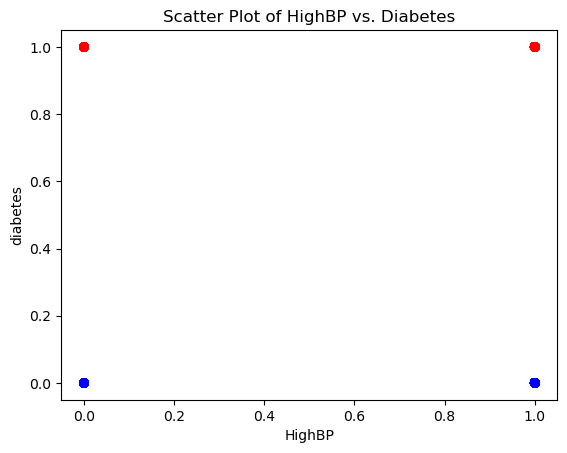

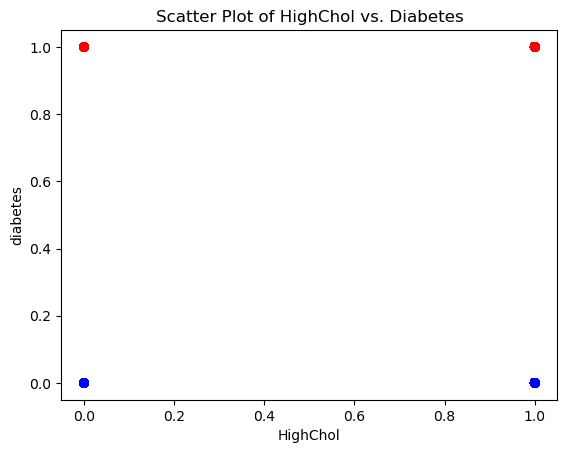

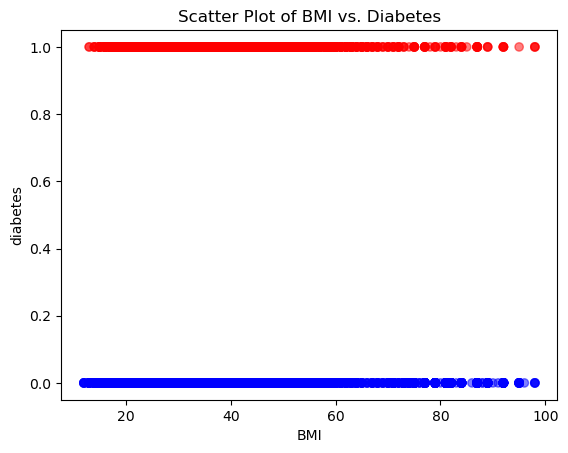

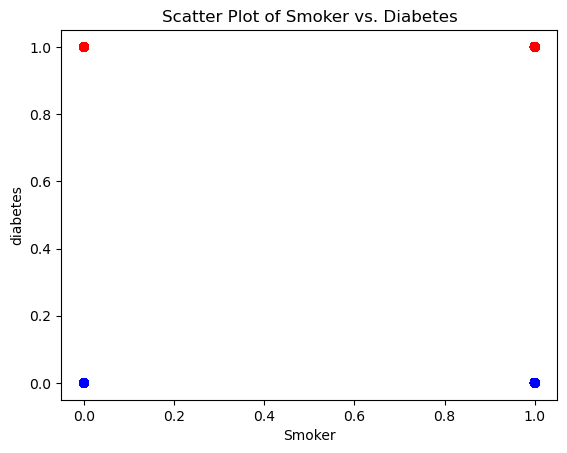

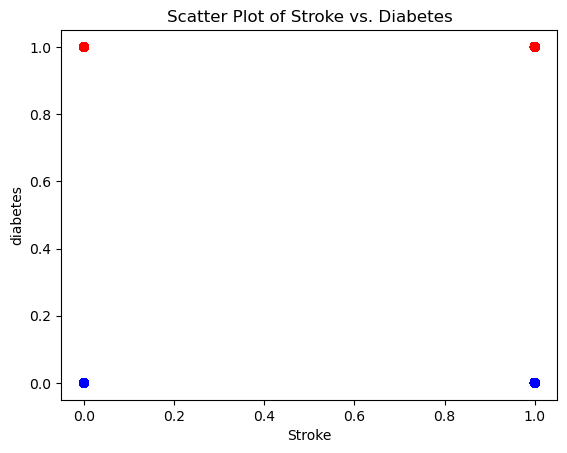

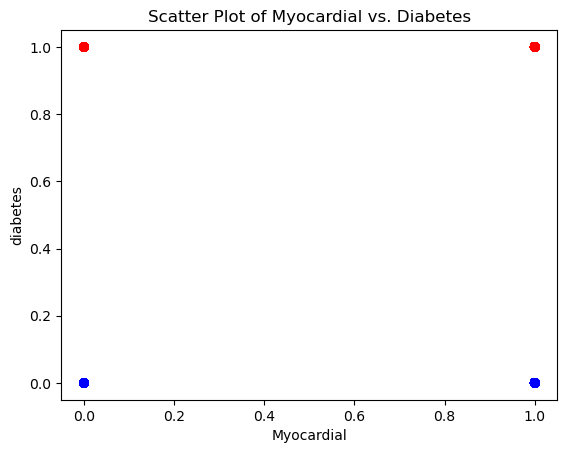

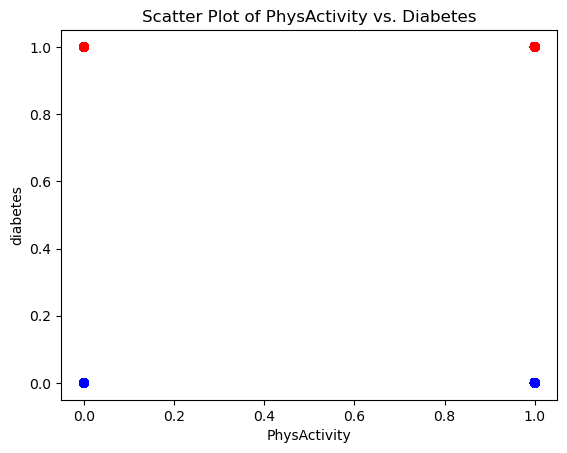

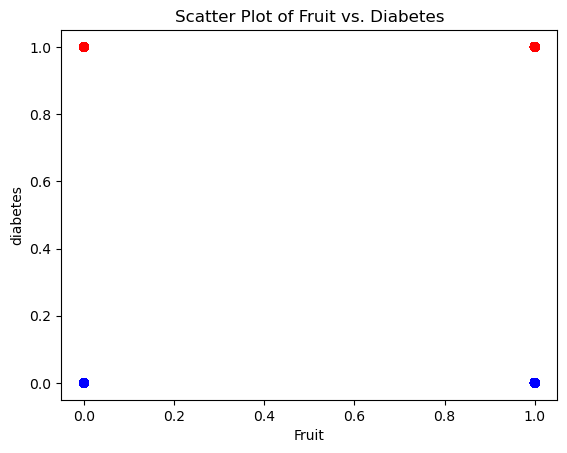

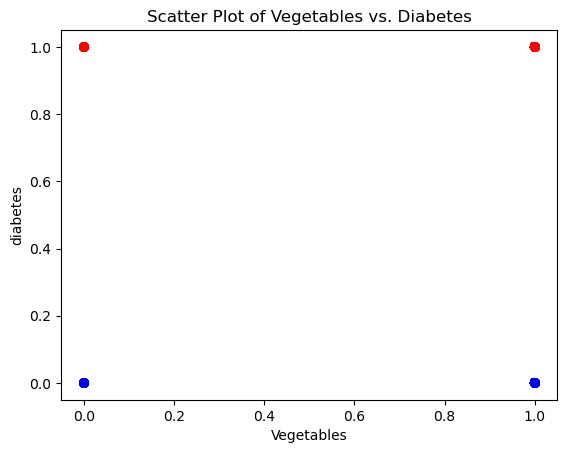

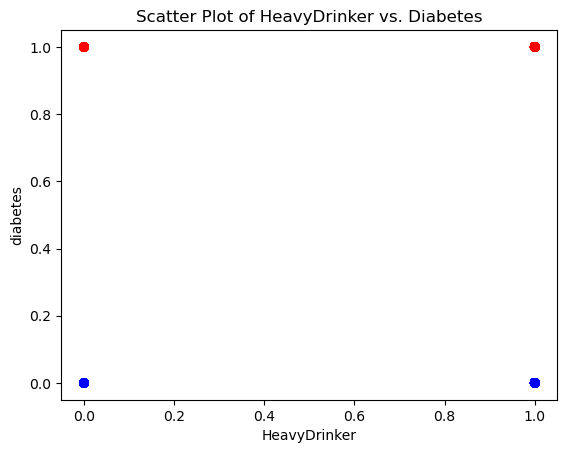

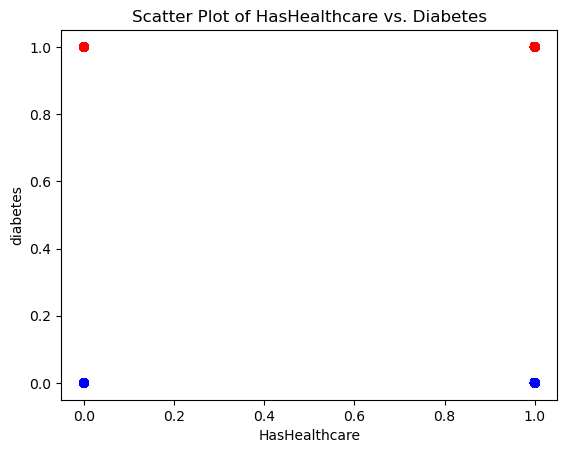

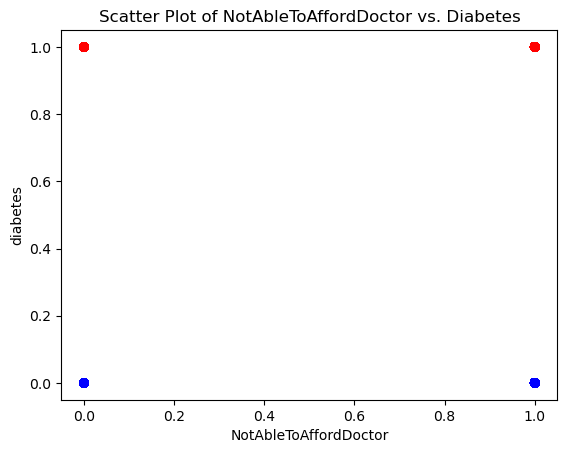

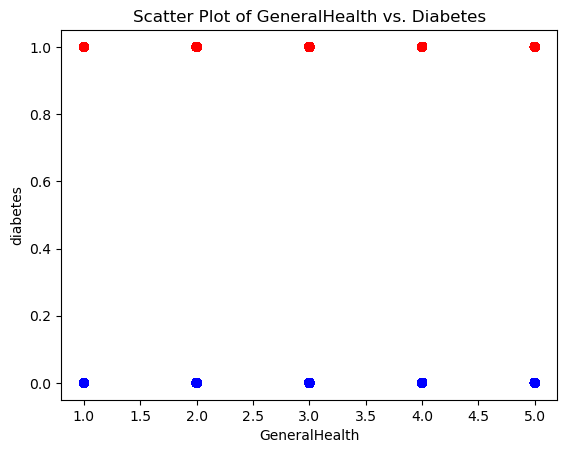

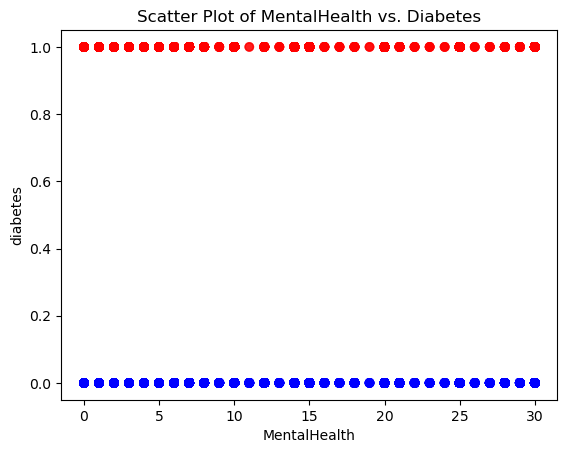

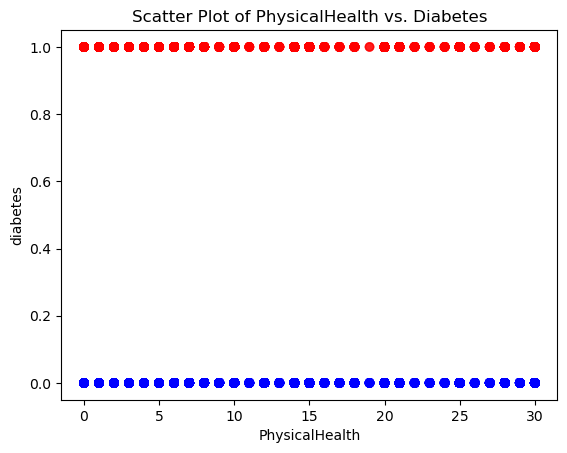

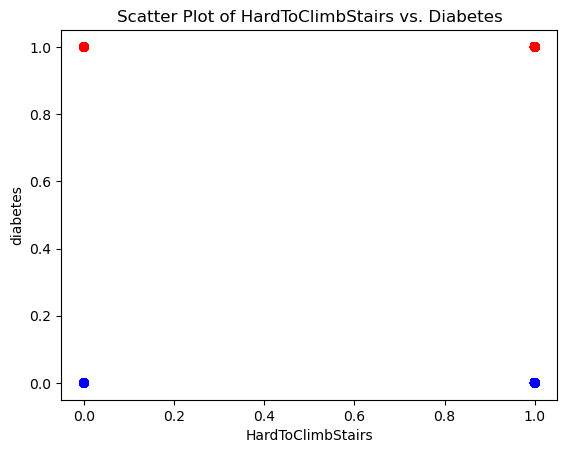

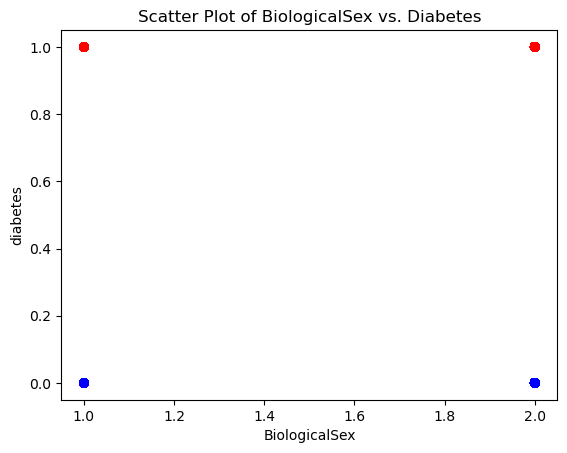

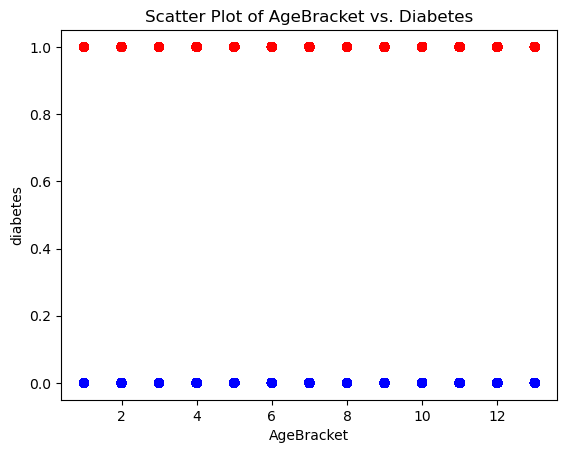

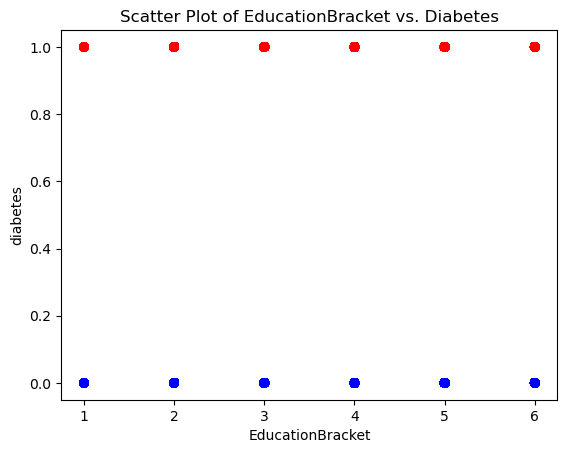

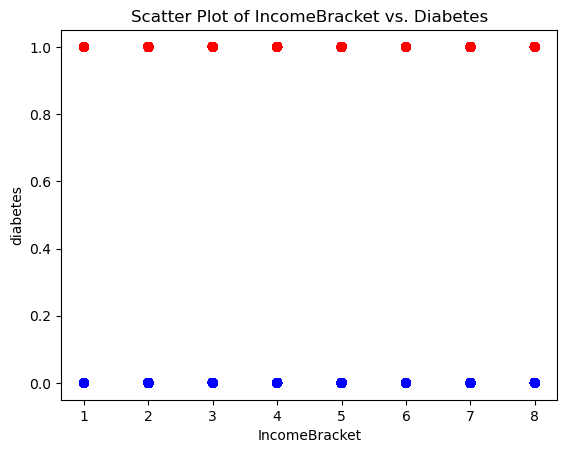

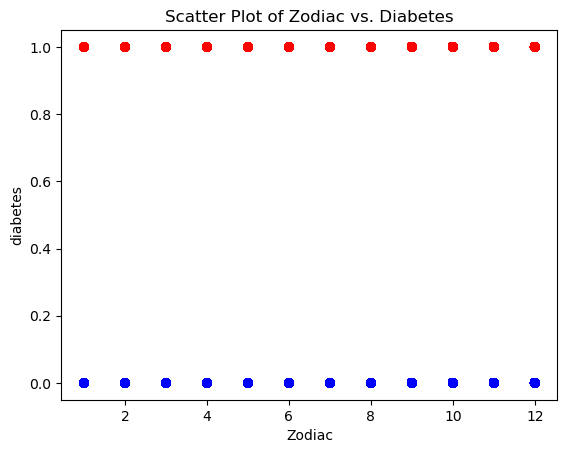

In [4]:
# Showing all data is linearly separable
for col in X:
    plt.scatter(df[col], y, c=y, cmap='bwr', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('diabetes')
    plt.title(f'Scatter Plot of {col} vs. Diabetes')
    plt.show()

# Q1

Betas corresponding to each predictor:

HighBP: 0.3692819748335356
HighChol: 0.2843271518182931
BMI: 0.4903335967119876
Smoker: 0.0030426508480082466
Stroke: 0.03754675198407695
Myocardial: 0.07876564138586886
PhysActivity: -0.01691830050036942
Fruit: -0.020055862748984455
Vegetables: -0.017406821914118322
HeavyDrinker: -0.1749796621602111
HasHealthcare: 0.0200158827803555
NotAbleToAffordDoctor: 0.0038791875598712913
GeneralHealth: 0.6216814091401933
MentalHealth: -0.034853977283413835
PhysicalHealth: -0.06256114089664849
HardToClimbStairs: 0.04365081851969874
BiologicalSex: 0.137580462468402
AgeBracket: 0.457454020717394
EducationBracket: -0.04244199543892218
IncomeBracket: -0.10872964416774433
Zodiac: 0.005801174261060438
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     65605
           1       0.31      0.77      0.44     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.75      0.63     

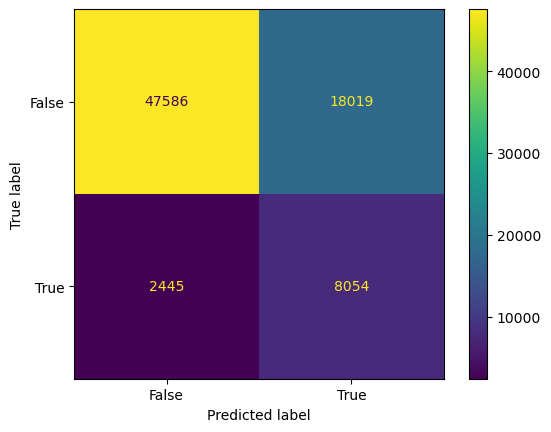

In [5]:
# Split the data into training and testing sets for each predictor
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

logist = LogisticRegression(class_weight='balanced')

logist.fit(xTrainScaled, yTrain)

betas = logist.coef_[0]
print("Betas corresponding to each predictor:\n")
for pred, beta in zip(X.columns, betas):
    print(f"{pred}: {beta}")

yPred = logist.predict(xTestScaled)
yProb = logist.predict_proba(xTestScaled)[:, 1]

print(classification_report(yTest, yPred))
print("ROC AUC for full logistic regression model:", roc_auc_score(yTest, yProb))
matr = confusion_matrix(yTest, yPred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matr, display_labels = [False, True])
cm_display.plot()
plt.show()

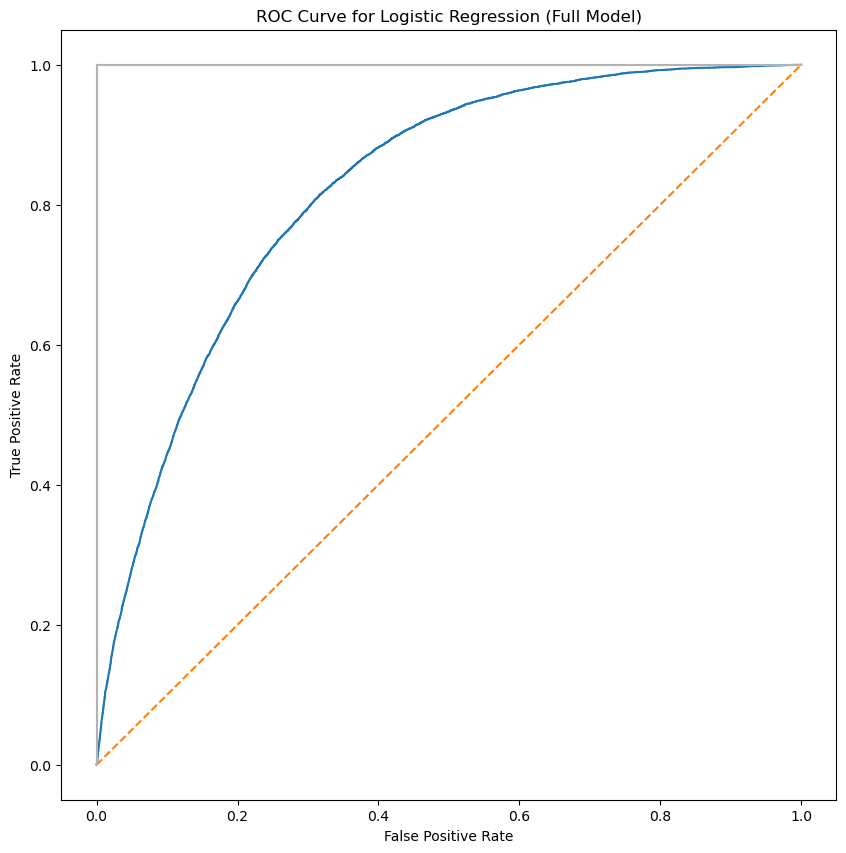

In [6]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yTest, yProb)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for Logistic Regression (Full Model)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
minCol = ''
minroc = 100
for col in X:
    predictors = X.drop([col],axis=1)
    # Split the data into training and testing sets for each predictor
    xTrain, xTest, yTrain, yTest = train_test_split(predictors, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)

    logist = LogisticRegression(class_weight='balanced')

    logist.fit(xTrainScaled, yTrain)
 
    yPred = logist.predict(xTestScaled)
    yProb = logist.predict_proba(xTestScaled)[:, 1]
    roc_score = roc_auc_score(yTest, yProb)
    if roc_score < minroc:
        minroc = roc_score
        minCol = col
        false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, yProb)
    #Classifying and displaying target model prediction
    print(f"Classification Report for logistic regression model without {col}:\n", classification_report(yTest, yPred))
    print(f"ROC AUC for full logistic regression model without {col}:", roc_score)
    print("---------------------------------------------------------------------------") 

Classification Report for logistic regression model without HighBP:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.30      0.75      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full logistic regression model without HighBP: 0.8140364836645158
---------------------------------------------------------------------------
Classification Report for logistic regression model without HighChol:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.31      0.76      0.44     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full logistic regression model without H

Classification Report for logistic regression model without HardToClimbStairs:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.31      0.77      0.44     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.75      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full logistic regression model without HardToClimbStairs: 0.8216012726258388
---------------------------------------------------------------------------
Classification Report for logistic regression model without BiologicalSex:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.31      0.77      0.44     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.75      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full logistic

The removal of GeneralHealth from the full model decreased the ROC AUC score to 0.8066993638141156, the most 
compared to the removal of other predictors.


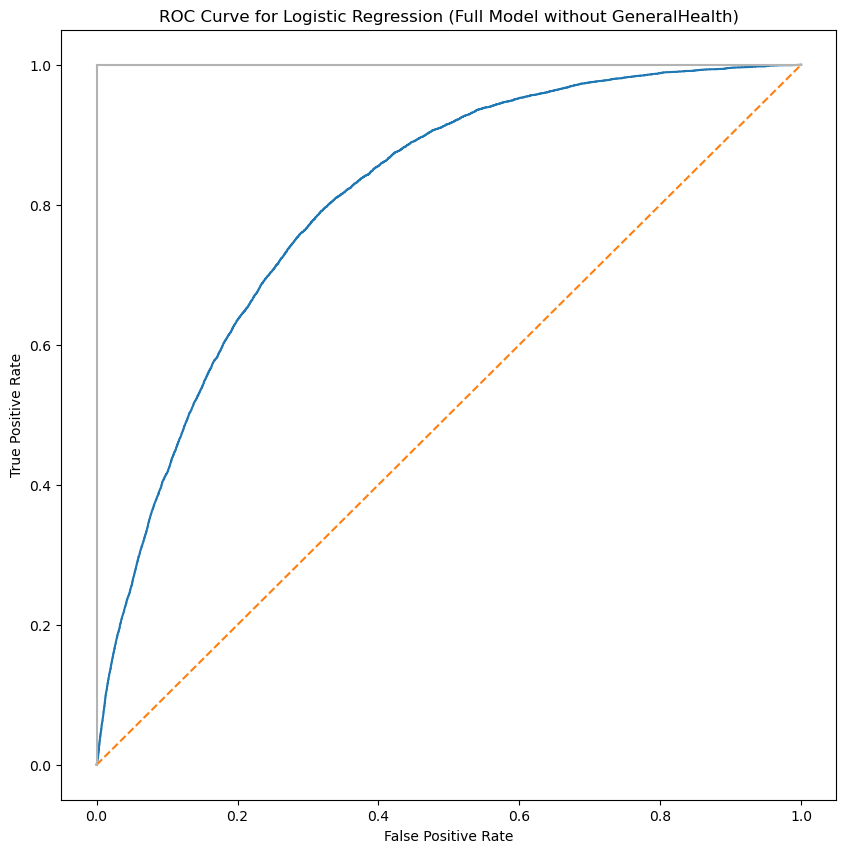

In [8]:
print(f"The removal of {minCol} from the full model decreased the ROC AUC score to {minroc}, the most \ncompared to the removal of other predictors.")

plt.subplots(1, figsize=(10,10))
plt.title(f'ROC Curve for Logistic Regression (Full Model without ' + minCol + ')')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Q2

Betas corresponding to each predictor:

HighBP: 0.1552102366718755
HighChol: 0.10917489116711872
BMI: 0.17396479747627555
Smoker: 0.0006135431872455104
Stroke: 0.012868098872767093
Myocardial: 0.03075119732662035
PhysActivity: -0.007105024973352973
Fruit: -0.006725939278355008
Vegetables: -0.007106907117910751
HeavyDrinker: -0.0664556641279742
HasHealthcare: 0.008138379573960852
NotAbleToAffordDoctor: 0.0004969615680687593
GeneralHealth: 0.23564923857313175
MentalHealth: -0.013876060598665212
PhysicalHealth: -0.025640664818308283
HardToClimbStairs: 0.019042223762985377
BiologicalSex: 0.05013631546936063
AgeBracket: 0.1638960400538504
EducationBracket: -0.01571163934377968
IncomeBracket: -0.042782620868046545
Zodiac: 0.001800847309959054
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.31      0.77      0.44     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.75  

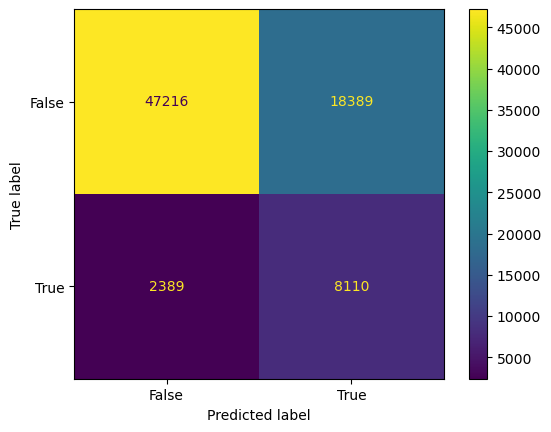

In [9]:
# Split the data into training and testing sets for each predictor
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

lsvc = LinearSVC(class_weight='balanced', max_iter=1000, dual=False, random_state=42)

lsvc.fit(xTrainScaled, yTrain)

betas = lsvc.coef_[0]
print("Betas corresponding to each predictor:\n")
for pred, beta in zip(X.columns, betas):
    print(f"{pred}: {beta}")

yPred = lsvc.predict(xTestScaled)
yProb = lsvc.decision_function(xTestScaled)
#Classifying and displaying target model prediction
print(classification_report(yTest, yPred))

print("ROC AUC for full SVM model:", roc_auc_score(yTest, yProb))
matr = confusion_matrix(yTest, yPred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matr, display_labels = [False, True])
cm_display.plot()
plt.show() 

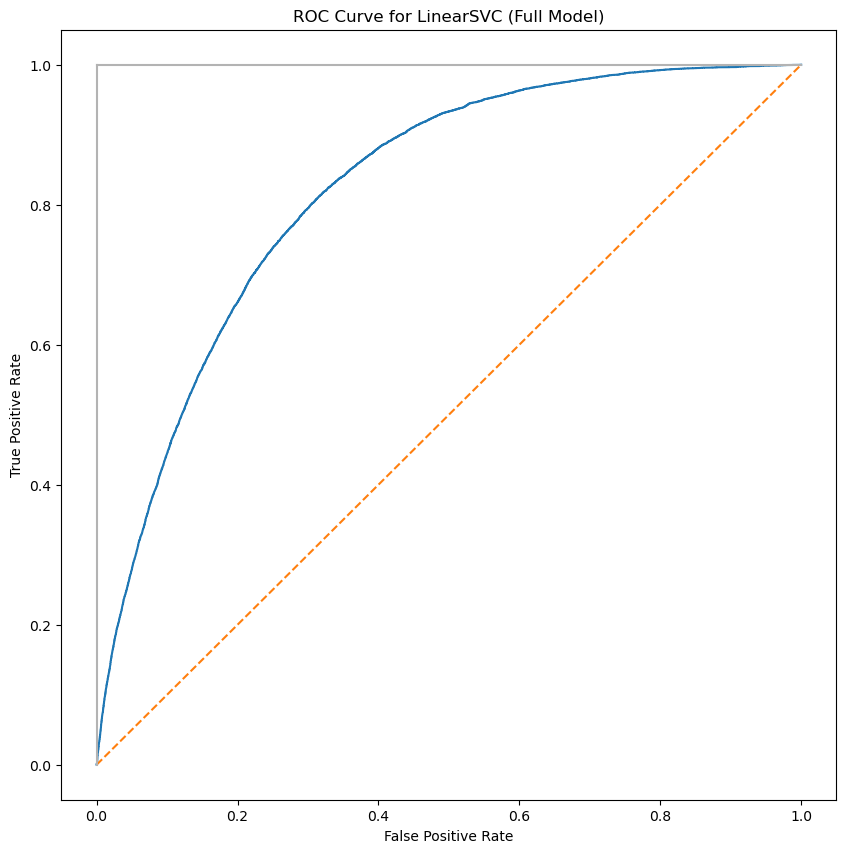

In [10]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yTest, yProb)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for LinearSVC (Full Model)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
minCol = ''
minroc = 100
for col in X:
    predictors = X.drop([col],axis=1)
    
    # Split the data into training and testing sets for each predictor
    xTrain, xTest, yTrain, yTest = train_test_split(predictors, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)

    lsvc = LinearSVC(class_weight='balanced', max_iter=1000, dual=False, random_state=42)

    lsvc.fit(xTrainScaled, yTrain)

    yPred = lsvc.predict(xTestScaled)
    yProb = lsvc.decision_function(xTestScaled)
    roc_score = roc_auc_score(yTest, yProb)
    if roc_score < minroc:
        minroc = roc_score
        minCol = col
        false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, yProb)
        
    #Classifying and displaying target model prediction
    print(f"Classification Report for SVM model without {col}:\n", classification_report(yTest, yPred))
    print(f"ROC AUC for full SVM model without {col}:", roc_score)
    print("---------------------------------------------------------------------------") 

Classification Report for SVM model without HighBP:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.30      0.76      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full SVM model without HighBP: 0.8138530698961688
---------------------------------------------------------------------------
Classification Report for SVM model without HighChol:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.30      0.77      0.43     10499

    accuracy                           0.72     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.72      0.76     76104

ROC AUC for full SVM model without HighChol: 0.8150171302257427
------------------------------------

Classification Report for SVM model without BiologicalSex:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     65605
           1       0.31      0.77      0.44     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.75      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full SVM model without BiologicalSex: 0.8204166123108368
---------------------------------------------------------------------------
Classification Report for SVM model without AgeBracket:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     65605
           1       0.31      0.75      0.43     10499

    accuracy                           0.73     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104

ROC AUC for full SVM model without AgeBracket: 0.8133465982972862
------------------

The removal of GeneralHealth from the full model decreased the ROC AUC score to 0.8061576447385805, the most 
compared to the removal of other predictors.


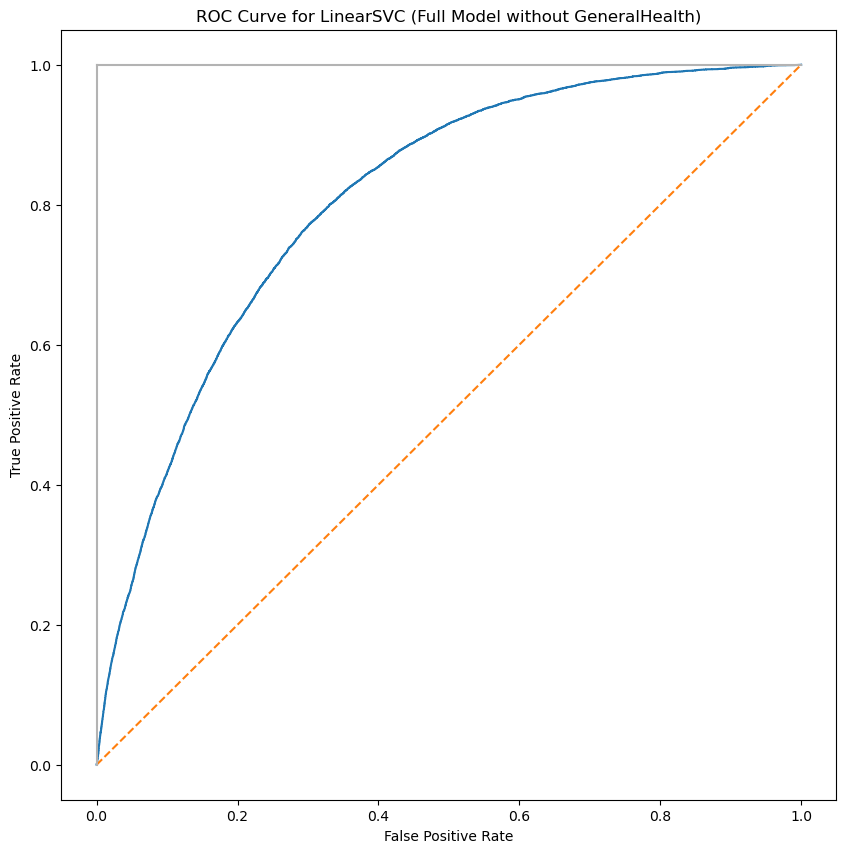

In [12]:
print(f"The removal of {minCol} from the full model decreased the ROC AUC score to {minroc}, the most \ncompared to the removal of other predictors.")

plt.subplots(1, figsize=(10,10))
plt.title(f'ROC Curve for LinearSVC (Full Model without {minCol})')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Q3

Feature Importances:
HighBP (Importance): 0.1439
HighChol (Importance): 0.0177
BMI (Importance): 0.1154
Smoker (Importance): 0.0252
Stroke (Importance): 0.0096
Myocardial (Importance): 0.0130
PhysActivity (Importance): 0.0218
Fruit (Importance): 0.0238
Vegetables (Importance): 0.0191
HeavyDrinker (Importance): 0.0085
HasHealthcare (Importance): 0.0070
NotAbleToAffordDoctor (Importance): 0.0101
GeneralHealth (Importance): 0.0977
MentalHealth (Importance): 0.0498
PhysicalHealth (Importance): 0.0600
HardToClimbStairs (Importance): 0.0143
BiologicalSex (Importance): 0.0209
AgeBracket (Importance): 0.0917
EducationBracket (Importance): 0.0518
IncomeBracket (Importance): 0.0782
Zodiac (Importance): 0.1205
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     65605
           1       0.29      0.29      0.29     10499

    accuracy                           0.80     76104
   macro avg       0.59      0.59      0.59     76104
weighted avg       

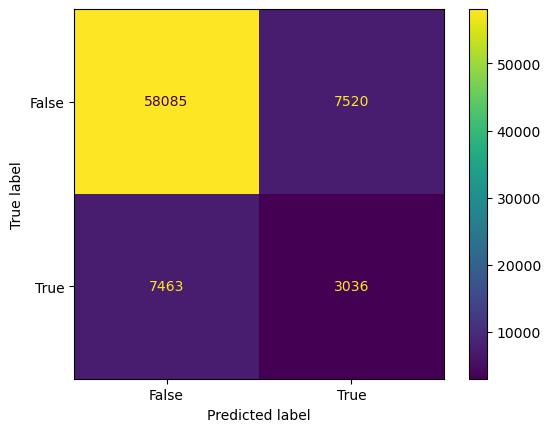

In [15]:
# Split the data into training and testing sets for each predictor
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')

tree.fit(xTrainScaled, yTrain)

yProb = tree.predict_proba(xTestScaled)[:, 1]
yPred = tree.predict(xTestScaled)

# Retrieve the feature importances
importances = tree.feature_importances_

# Print the feature importances
print("Feature Importances:")
for pred, importance in zip(X.columns, importances):
    print(f"{pred} (Importance): {importance:.4f}")

print(classification_report(yTest, yPred))

print("ROC AUC for full model:", roc_auc_score(yTest, yProb))
matr = confusion_matrix(yTest, yPred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matr, display_labels = [False, True])
cm_display.plot()
plt.show()

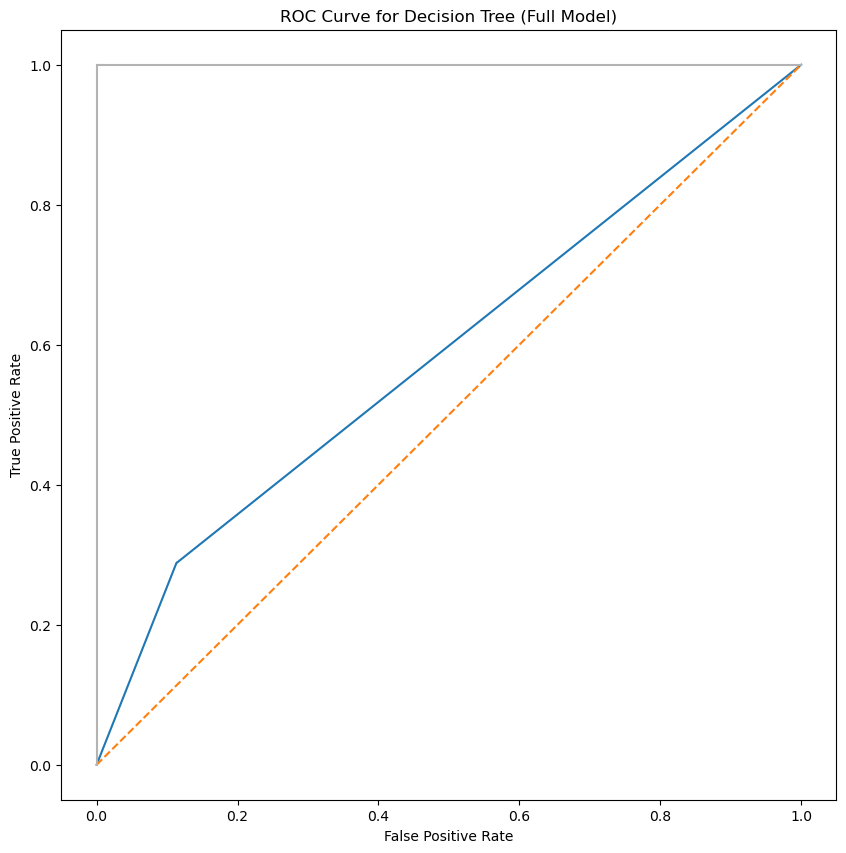

In [16]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yTest, yProb)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for Decision Tree (Full Model)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
minCol = ''
minroc = 100
for col in X:
    predictors = X.drop([col],axis=1)

    # Split the data into training and testing sets for each predictor
    xTrain, xTest, yTrain, yTest = train_test_split(predictors, y, test_size=0.3, random_state=42)
    
    # Initialize and train the decision tree classifier`
    tree = DecisionTreeClassifier(random_state=42,class_weight='balanced')
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)
    
    tree.fit(xTrainScaled, yTrain)
    yProb = tree.predict_proba(xTestScaled)[:, 1]
    yPred = tree.predict(xTestScaled)
    roc_score = roc_auc_score(yTest, yProb)
    if roc_score < minroc:
        minroc = roc_score
        minCol = col
        false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, yProb)
    
    print(f"Classification Report for {col}:\n", classification_report(yTest, yPred))
    print(f"ROC AUC for full Decision Tree model without {col}:", roc_score)
    print("---------------------------------------------------------------------------")

Classification Report for HighBP:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88     65605
           1       0.28      0.27      0.28     10499

    accuracy                           0.80     76104
   macro avg       0.58      0.58      0.58     76104
weighted avg       0.80      0.80      0.80     76104

ROC AUC for full Decision Tree model without HighBP: 0.5801660069331023
---------------------------------------------------------------------------
Classification Report for HighChol:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     65605
           1       0.28      0.29      0.28     10499

    accuracy                           0.80     76104
   macro avg       0.58      0.59      0.58     76104
weighted avg       0.80      0.80      0.80     76104

ROC AUC for full Decision Tree model without HighChol: 0.585406220598898
-----------------------------------------------------

Classification Report for BiologicalSex:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     65605
           1       0.28      0.29      0.29     10499

    accuracy                           0.80     76104
   macro avg       0.59      0.59      0.59     76104
weighted avg       0.80      0.80      0.80     76104

ROC AUC for full Decision Tree model without BiologicalSex: 0.5862864500347382
---------------------------------------------------------------------------
Classification Report for AgeBracket:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     65605
           1       0.27      0.28      0.27     10499

    accuracy                           0.80     76104
   macro avg       0.58      0.58      0.58     76104
weighted avg       0.80      0.80      0.80     76104

ROC AUC for full Decision Tree model without AgeBracket: 0.5795977223114851
----------------------------------

The removal of BMI from the full model decreased the ROC AUC score to 0.579299270785342, the most 
compared to the removal of other predictors.


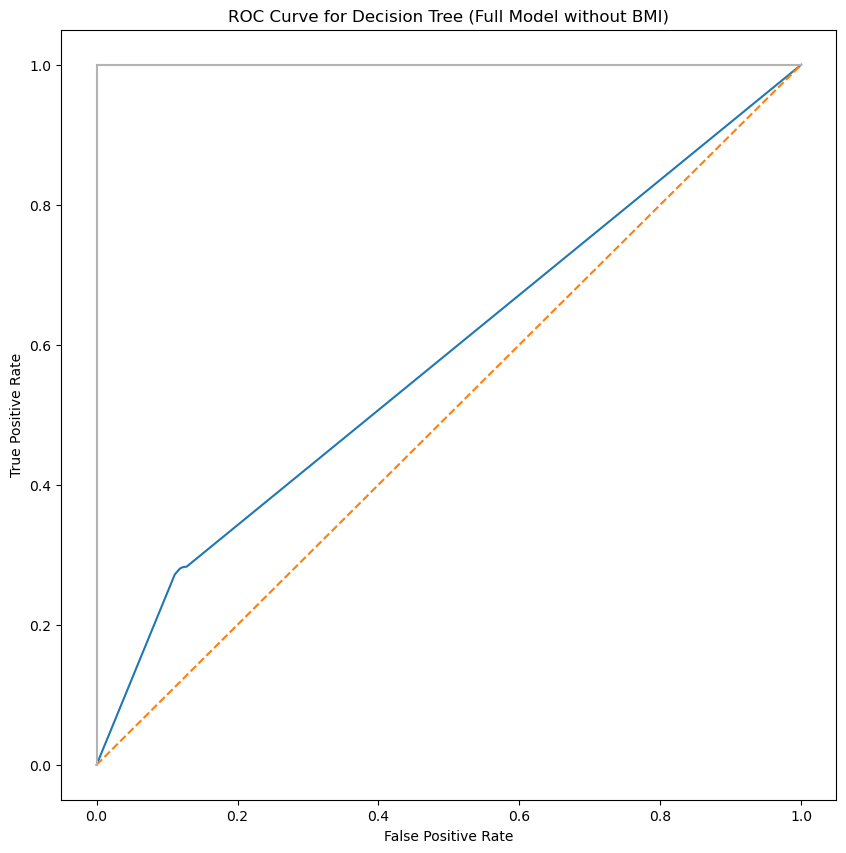

In [18]:
print(f"The removal of {minCol} from the full model decreased the ROC AUC score to {minroc}, the most \ncompared to the removal of other predictors.")

plt.subplots(1, figsize=(10,10))
plt.title(f'ROC Curve for Decision Tree (Full Model without {minCol})')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Q4

Feature Importances:
HighBP (Importance): 0.0735
HighChol (Importance): 0.0375
BMI (Importance): 0.1502
Smoker (Importance): 0.0244
Stroke (Importance): 0.0089
Myocardial (Importance): 0.0171
PhysActivity (Importance): 0.0194
Fruit (Importance): 0.0246
Vegetables (Importance): 0.0191
HeavyDrinker (Importance): 0.0083
HasHealthcare (Importance): 0.0067
NotAbleToAffordDoctor (Importance): 0.0108
GeneralHealth (Importance): 0.1032
MentalHealth (Importance): 0.0460
PhysicalHealth (Importance): 0.0602
HardToClimbStairs (Importance): 0.0249
BiologicalSex (Importance): 0.0226
AgeBracket (Importance): 0.1116
EducationBracket (Importance): 0.0497
IncomeBracket (Importance): 0.0718
Zodiac (Importance): 0.1095
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     65605
           1       0.52      0.13      0.21     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.57     76104
weighted avg       

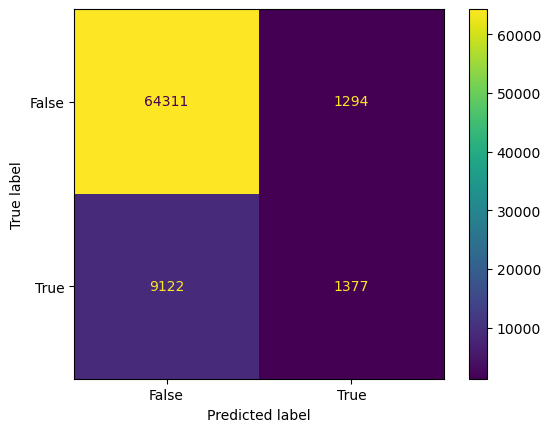

In [19]:
# Split the data into training and testing sets for each predictor
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini', class_weight='balanced')

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

forest.fit(xTrainScaled, yTrain)

yProb = forest.predict_proba(xTestScaled)[:, 1]
yPred = forest.predict(xTestScaled)

# Retrieve the feature importances
importances = forest.feature_importances_

# Print the feature importances
print("Feature Importances:")
for pred, importance in zip(X.columns, importances):
    print(f"{pred} (Importance): {importance:.4f}")

print(classification_report(yTest, yPred))  

print("ROC AUC for full random forest model:", roc_auc_score(yTest, yProb))
matr = confusion_matrix(yTest, yPred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matr, display_labels = [False, True])
cm_display.plot()
plt.show() 

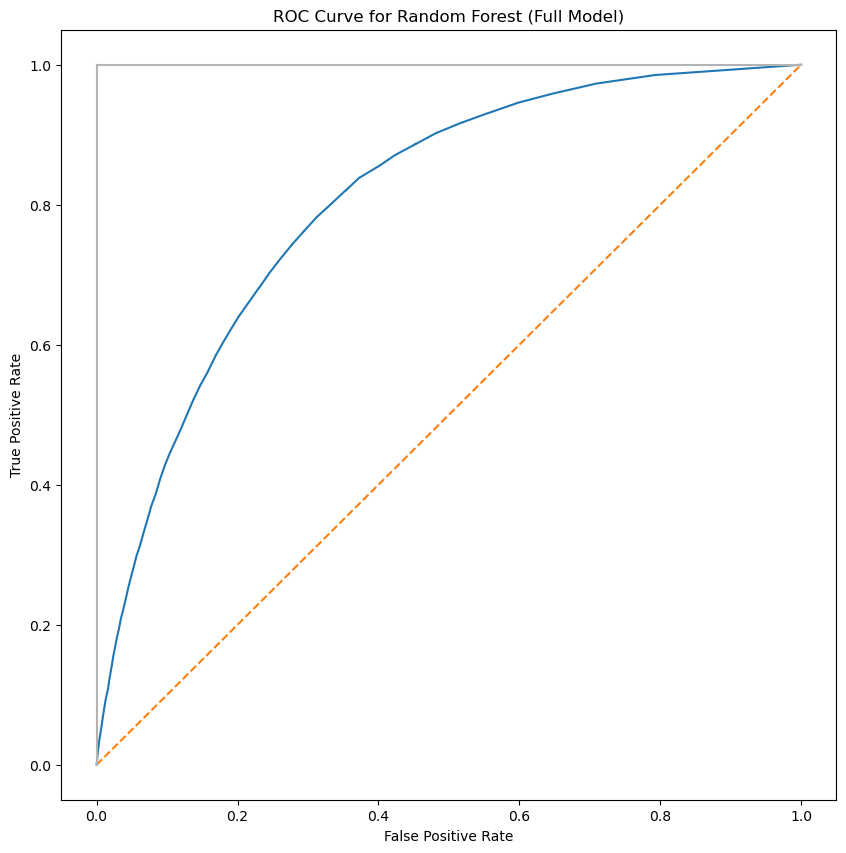

In [20]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yTest, yProb)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for Random Forest (Full Model)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
minCol = ''
minroc = 100

for col in X:
    predictors = X.drop([col],axis=1)    
    
    # Initialize and train the rf classifier`
    forest = RandomForestClassifier(n_estimators=50, random_state=42, criterion='gini', class_weight='balanced', n_jobs=-1)
    
    xTrain, xTest, yTrain, yTest = train_test_split(predictors, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)
    
    forest.fit(xTrainScaled, yTrain)
    yProb = forest.predict_proba(xTestScaled)[:, 1]
    yPred = forest.predict(xTestScaled)
    roc_score = roc_auc_score(yTest, yProb)
    if roc_score < minroc:
        minroc = roc_score
        minCol = col
        false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, yProb)    
    
    print(f"Classification Report for model without {col}:\n", classification_report(yTest, yPred))
    print(f"ROC AUC for full model without {col}:", roc_score)
    print("---------------------------------------------------------------------------")

Classification Report for model without HighBP:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     65605
           1       0.50      0.12      0.20     10499

    accuracy                           0.86     76104
   macro avg       0.69      0.55      0.56     76104
weighted avg       0.82      0.86      0.82     76104

ROC AUC for full model without HighBP: 0.7908730798369792
---------------------------------------------------------------------------
Classification Report for model without HighChol:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     65605
           1       0.48      0.12      0.19     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.55      0.56     76104
weighted avg       0.82      0.86      0.82     76104

ROC AUC for full model without HighChol: 0.791471721453121
-----------------------------------------------------

Classification Report for model without BiologicalSex:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     65605
           1       0.49      0.14      0.22     10499

    accuracy                           0.86     76104
   macro avg       0.68      0.56      0.57     76104
weighted avg       0.82      0.86      0.83     76104

ROC AUC for full model without BiologicalSex: 0.7974464242674071
---------------------------------------------------------------------------
Classification Report for model without AgeBracket:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     65605
           1       0.46      0.14      0.22     10499

    accuracy                           0.86     76104
   macro avg       0.67      0.56      0.57     76104
weighted avg       0.82      0.86      0.82     76104

ROC AUC for full model without AgeBracket: 0.7798031269163448
----------------------------------

The removal of BMI from the full model decreased the ROC AUC score to 0.7678973008044817, the most 
compared to the removal of other predictors.


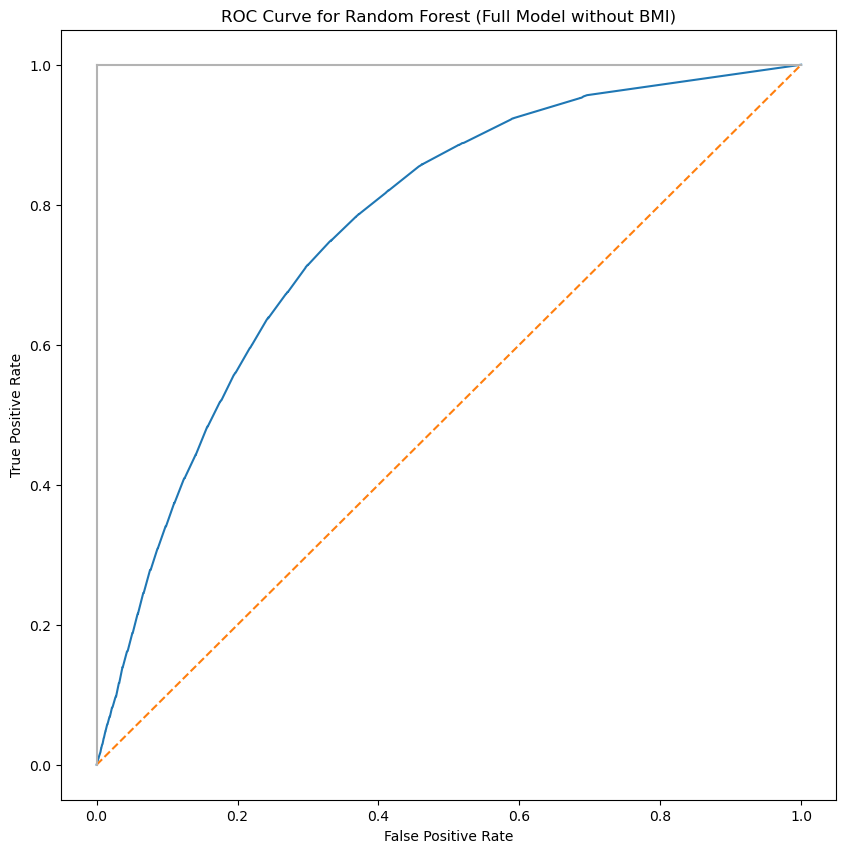

In [22]:
print(f"The removal of {minCol} from the full model decreased the ROC AUC score to {minroc}, the most \ncompared to the removal of other predictors.")

plt.subplots(1, figsize=(10,10))
plt.title(f'ROC Curve for Random Forest (Full Model without {minCol})')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Q5

Feature Importances:
HighBP (Importance): 0.0237
HighChol (Importance): 0.0383
BMI (Importance): 0.2177
Smoker (Importance): 0.0190
Stroke (Importance): 0.0047
Myocardial (Importance): 0.0198
PhysActivity (Importance): 0.0115
Fruit (Importance): 0.0158
Vegetables (Importance): 0.0011
HeavyDrinker (Importance): 0.0127
HasHealthcare (Importance): 0.0171
NotAbleToAffordDoctor (Importance): 0.0009
GeneralHealth (Importance): 0.1190
MentalHealth (Importance): 0.0301
PhysicalHealth (Importance): 0.0366
HardToClimbStairs (Importance): 0.0283
BiologicalSex (Importance): 0.0550
AgeBracket (Importance): 0.1644
EducationBracket (Importance): 0.0488
IncomeBracket (Importance): 0.0848
Zodiac (Importance): 0.0507
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     65605
           1       0.30      0.80      0.44     10499

    accuracy                           0.72     76104
   macro avg       0.63      0.75      0.62     76104
weighted avg       

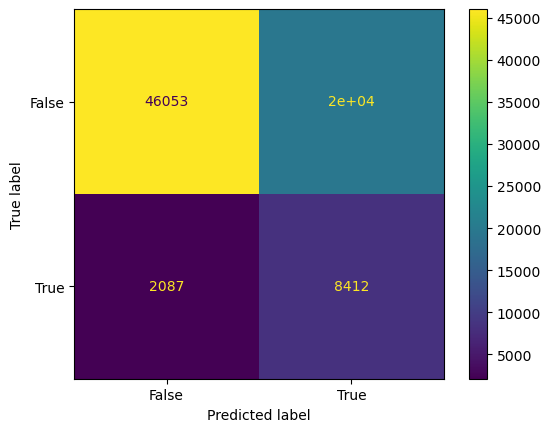

In [23]:
# Split the data into training and testing sets for each predictor
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, class_weight='balanced'), algorithm="SAMME.R", n_estimators=100, learning_rate=1
)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

bdt.fit(xTrainScaled, yTrain)

yProb = bdt.predict_proba(xTestScaled)[:, 1]
yPred = bdt.predict(xTestScaled)

# Retrieve the feature importances
importances = bdt.feature_importances_

# Print the feature importances
print("Feature Importances:")
for pred, importance in zip(X.columns, importances):
    print(f"{pred} (Importance): {importance:.4f}")

print(classification_report(yTest, yPred))  

print("ROC AUC for full adaBoost model:", roc_auc_score(yTest, yProb))
matr = confusion_matrix(yTest, yPred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matr, display_labels = [False, True])
cm_display.plot()
plt.show() 

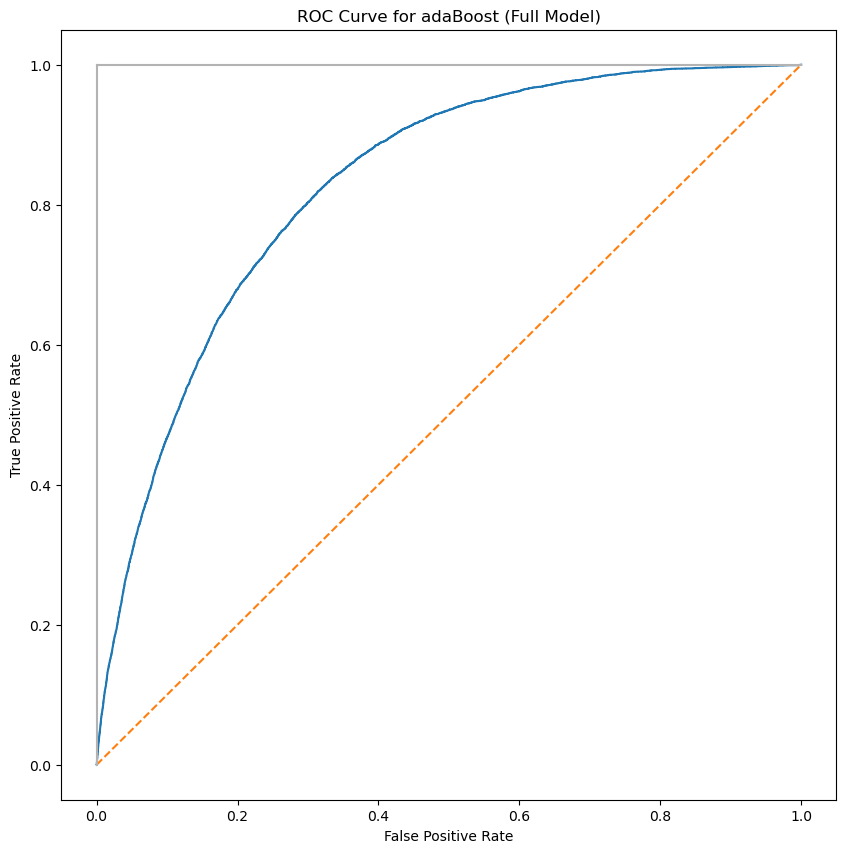

In [24]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yTest, yProb)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for adaBoost (Full Model)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
minCol = ''
minroc = 100

for col in X:
    predictors = X.drop([col],axis=1)

    # Split the data into training and testing sets for each predictor
    xTrain, xTest, yTrain, yTest = train_test_split(predictors, y, test_size=0.3, random_state=42)
    
    # Initialize and train the rf classifier`
    bdt = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2, class_weight='balanced'), algorithm="SAMME.R", n_estimators=50, learning_rate=1
    )
    
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)
    
    bdt.fit(xTrainScaled, yTrain)
    
    yPred = bdt.predict(xTestScaled)
    yProb = bdt.predict_proba(xTestScaled)[:, 1]
    roc_score = roc_auc_score(yTest, yProb)
    if roc_score < minroc:
        minroc = roc_score
        minCol = col
        false_positive_rate, true_positive_rate, threshold = roc_curve(yTest, yProb)   
    
    print(f"Classification Report for adaBoost model without {col}:\n", classification_report(yTest, yPred))
    print(f"ROC AUC for full adaBoost model without {col}:", roc_score)
    print("---------------------------------------------------------------------------")

Classification Report for adaBoost model without HighBP:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     65605
           1       0.30      0.79      0.43     10499

    accuracy                           0.71     76104
   macro avg       0.62      0.74      0.62     76104
weighted avg       0.86      0.71      0.76     76104

ROC AUC for full adaBoost model without HighBP: 0.8188973296305238
---------------------------------------------------------------------------
Classification Report for adaBoost model without HighChol:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     65605
           1       0.29      0.80      0.43     10499

    accuracy                           0.71     76104
   macro avg       0.63      0.75      0.62     76104
weighted avg       0.86      0.71      0.75     76104

ROC AUC for full adaBoost model without HighChol: 0.8211690772659082
----------------

Classification Report for adaBoost model without BiologicalSex:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     65605
           1       0.30      0.80      0.44     10499

    accuracy                           0.71     76104
   macro avg       0.63      0.75      0.62     76104
weighted avg       0.87      0.71      0.76     76104

ROC AUC for full adaBoost model without BiologicalSex: 0.8261266940916465
---------------------------------------------------------------------------
Classification Report for adaBoost model without AgeBracket:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     65605
           1       0.30      0.78      0.43     10499

    accuracy                           0.72     76104
   macro avg       0.62      0.74      0.62     76104
weighted avg       0.86      0.72      0.76     76104

ROC AUC for full adaBoost model without AgeBracket: 0.817953028127807

The removal of GeneralHealth from the full model decreased the ROC AUC score to 0.8102740790386262, the most 
compared to the removal of other predictors.


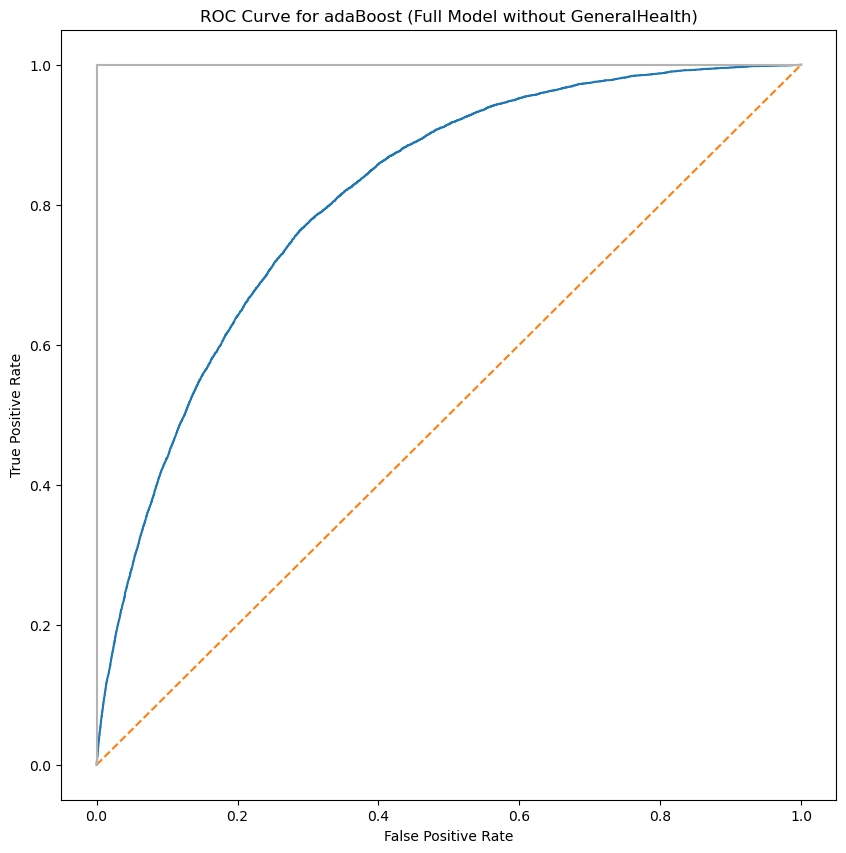

In [26]:
print(f"The removal of {minCol} from the full model decreased the ROC AUC score to {minroc}, the most \ncompared to the removal of other predictors.")

plt.subplots(1, figsize=(10,10))
plt.title(f'ROC Curve for adaBoost (Full Model without {minCol})')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()